Data Science Praktikum 2
=================
**Wir möchten verstehen, wie effizient Teams historisch Geld ausgegeben und dafür Siege erzielt
haben. Im Falle von Moneyball würde man erwarten, dass Oakland vor 2000 nicht viel effizienter
in ihren Ausgaben war als andere Teams, zwischen 2000 und 2005 viel effizienter war (immerhin
wurde darüber ein Film gemacht) und bis dahin andere Teams aufgeholt haben könnten. Deine
Aufgabe in diesem Projekt ist es, zu sehen, wie dies in den Daten, die wir haben, reflektiert wird.**

Testausgabe:



In [3]:
import sqlite3
import pandas

sqlite_file = 'lahman_1871-2022.sqlite'
conn = sqlite3.connect(sqlite_file)
salary_query = """SELECT yearID, sum(salary) as total_payroll
                  FROM Salaries
                  WHERE lgID == 'AL'
                  GROUP BY yearID"""
team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


Aufgabe 1 - Wrangling
---------
Verwende SQL, um eine Beziehung zu berechnen, die das Gesamtgehalt und den
Gewinnprozentsatz (Anzahl der Siege / Anzahl der Spiele * 100) für jedes Team (d.h. für jede
TeamID- und YearID-Kombination) enthält. Du solltest andere Spalten einbeziehen, die bei der
späteren Durchführung der Analyse hilfreich sein werden (z.B. Franchise-IDs, Anzahl der Siege,
Anzahl der Spiele).
Füge den SQL-Code, den du verwendet hast, um diese Beziehung zu erstellen, in deinen Bericht
ein. Beschreibe, wie du mit fehlenden Daten in diesen beiden Beziehungen umgegangen bist.
Gib insbesondere an, ob in einer der Tabellen Daten fehlen und wie die Art des von dir
verwendeten Joins bestimmt, wie du mit diesen fehlenden Daten umgegangen bist. Eine
Anmerkung zu SQL: Du musst auf die Division von Ganzzahlen vs. Fließkommazahlen achten.


In [19]:
import sqlite3
import pandas as pd

# Verbindung zur SQLite‑Datenbank öffnen
sqlite_file = 'lahman_1871-2022.sqlite'
conn = sqlite3.connect(sqlite_file)

# SQL‑Abfrage: Gesamtgehalt pro Jahr und Team
query = """
        SELECT Salaries.yearID,
               Salaries.teamID,
               SUM(Salaries.salary)        AS total_salary,
               Teams.W                     AS wins,
               Teams.G                     AS games,
               (Teams.W * 100.0 / Teams.G) AS win_percentage,
               Teams.franchID
        FROM Salaries
                 JOIN Teams
                      ON Salaries.yearID = Teams.yearID AND Salaries.teamID = Teams.teamID
        GROUP BY Salaries.yearID,
                 Salaries.teamID
        ORDER BY Salaries.yearID,
                 Salaries.teamID; \
		 \
		"""

# Abfrage ausführen und in ein DataFrame laden
team_year_salaries = pd.read_sql_query(query, conn)

# Verbindung schließen
conn.close()

# Die ersten Zeilen des Ergebnisses anzeigen
print(team_year_salaries.head(1000))


     yearID teamID  total_salary  wins  games  win_percentage franchID
0      1985    ATL    14807000.0    66    162       40.740741      ATL
1      1985    BAL    11560712.0    83    161       51.552795      BAL
2      1985    BOS    10897560.0    81    163       49.693252      BOS
3      1985    CAL    14427894.0    90    162       55.555556      ANA
4      1985    CHA     9846178.0    85    163       52.147239      CHW
..      ...    ...           ...   ...    ...             ...      ...
913    2016    SLN   143053500.0    86    162       53.086420      STL
914    2016    TBA    57097310.0    68    162       41.975309      TBD
915    2016    TEX   176038723.0    95    162       58.641975      TEX
916    2016    TOR   138701700.0    89    162       54.938272      TOR
917    2016    WAS   141652646.0    95    162       58.641975      WSN

[918 rows x 7 columns]


***Die Daten gehen von 1985 bis 2016, wir stießen bei der Bearbeitung der Aufgabe auf keinerlei Unvollständigkeiten. Dies kann sich allerdings bei der Nutzung von Zeilen anderen Tabellen noch ändern.***


# Aufgabe 2 - Explorative Datenanalyse
---------
# Problem 2

Schreibe Code, um Diagramme zu erstellen, die die Verteilung der Gehälter über die Teams in
Abhängigkeit von der Zeit (von 1990-2014) veranschaulichen.


<Figure size 1400x600 with 0 Axes>

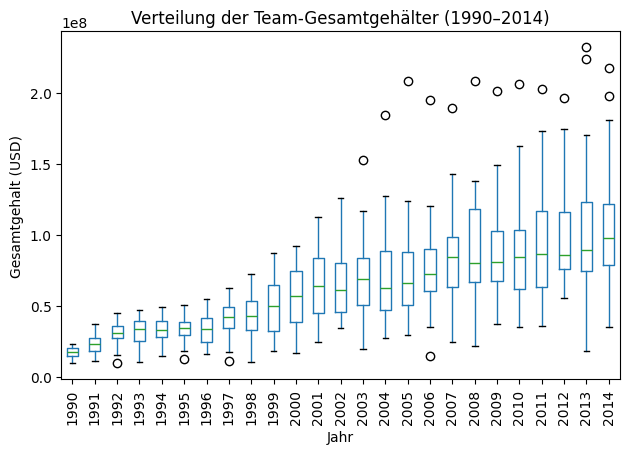

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1) Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# 2) SQL‑Query ausführen und in DataFrame laden
sql = """
      SELECT yearID,
             teamID,
             SUM(salary) AS total_salary
      FROM Salaries
      WHERE yearID BETWEEN 1990 AND 2014
      GROUP BY yearID,
               teamID
      ORDER BY yearID,
               teamID; \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# 3) Boxplot: pro Jahr die Verteilung der Team‑Gehälter
plt.figure(figsize=(14, 6))
df.boxplot(column='total_salary', by='yearID', grid=False)
plt.title('Verteilung der Team-Gesamtgehälter (1990–2014)')
plt.suptitle('')
plt.xlabel('Jahr')
plt.ylabel('Gesamtgehalt (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Frage 1

Welche Aussagen kannst du über die Verteilung der Gehälter in Abhängigkeit von der Zeit
aufgrund dieser Diagramme machen? Denke daran, dass du Aussagen in Bezug auf die zentrale
Tendenz, die Streuung usw. machen kannst.

**Zentrale Tendenz:**

- Median steigt über die Zeit konstant an
- Baseball-Gehälter steigen stark an (Inflation nicht berücksichtigt)

**Streuung**

- Wachsend, da Interquartilsabstände steigen
- Gehaltskluft also steigend

**Ausreißer**

- Die Punkte verdeutlichen auch den Anstieg an Ausreißern was die These der steigendenden Gehaltskluft belegt


# Problem 3

Schreibe Code, um Diagramme zu erstellen, die speziell mindestens eine der Aussagen, die du
in Frage 1 gemacht hast, zeigen. Wenn du zum Beispiel eine Aussage darüber machst, dass es
einen Trend gibt, dass die Gehälter im Laufe der Zeit abnehmen, erstelle ein Diagramm einer
Statistik für die zentrale Tendenz (z.B. durchschnittliches Gehalt) vs. Zeit, um das speziell zu
zeigen.

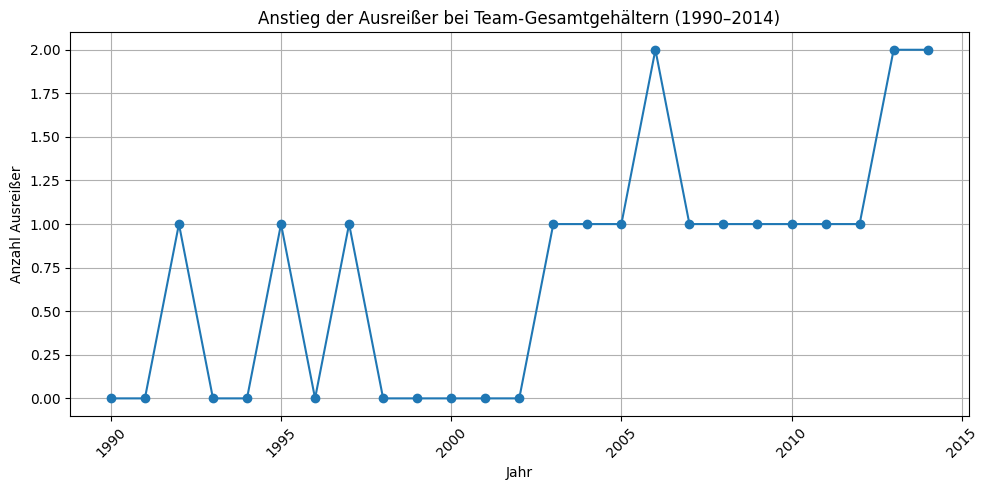

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 2) Daten aus der DB laden
conn = sqlite3.connect('lahman_1871-2022.sqlite')
sql = """
      SELECT yearID,
             teamID,
             SUM(salary) AS total_salary
      FROM Salaries
      WHERE yearID BETWEEN 1990 AND 2014
      GROUP BY yearID, teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()


# 3) Funktion zum Zählen der Ausreißer nach 1.5*IQR-Regel
def count_outliers(x):
	q1 = x.quantile(0.25)
	q3 = x.quantile(0.75)
	iqr = q3 - q1
	lower = q1 - 1.5 * iqr
	upper = q3 + 1.5 * iqr
	return ((x < lower) | (x > upper)).sum()


# 4) Ausreißer pro Jahr aggregieren
outliers_per_year = df.groupby('yearID')['total_salary'].apply(count_outliers)

# 5) Plotten: Anzahl Ausreißer vs. Jahr
plt.figure(figsize=(10, 5))
plt.plot(outliers_per_year.index, outliers_per_year.values, marker='o')
plt.title('Anstieg der Ausreißer bei Team-Gesamtgehältern (1990–2014)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Ausreißer')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Problem 4

Schreibe Code, um den gesamten Zeitraum in fünf Zeitperioden zu diskretisieren (du kannst
pandas.cut verwenden, um dies zu erreichen) und dann ein Streudiagramm zu erstellen, das
den durchschnittlichen Gewinnprozentsatz (y-Achse) vs. das durchschnittliche Gehalt (x-
Achse) für jede der fünf Zeitperioden zeigt. Du könntest eine Regressionslinie (mit z.B. N umPys
polyfit) in jedem Streudiagramm hinzufügen, um die Interpretation zu erleichtern.

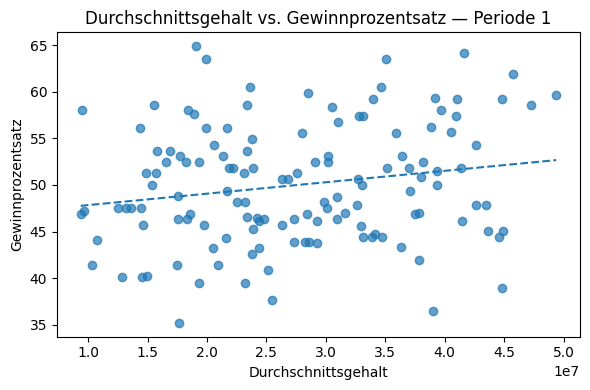

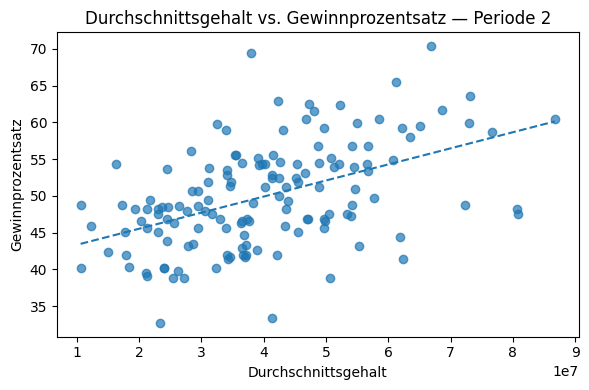

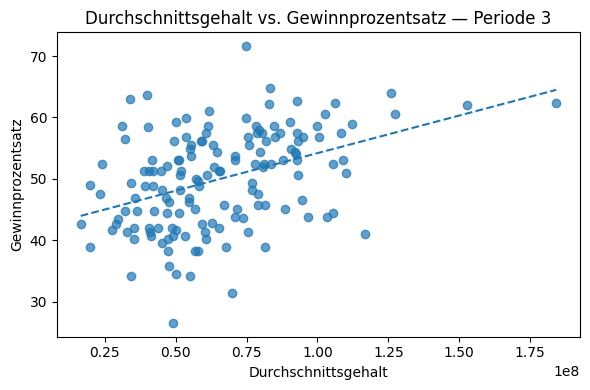

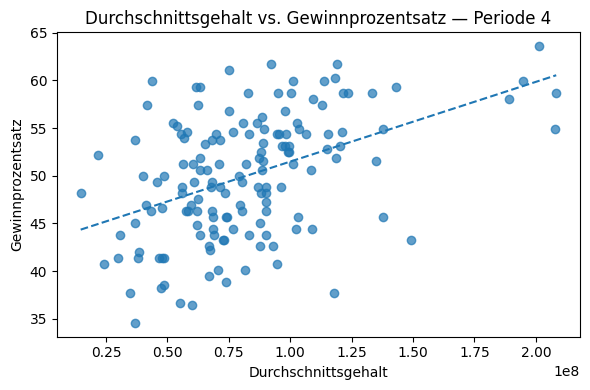

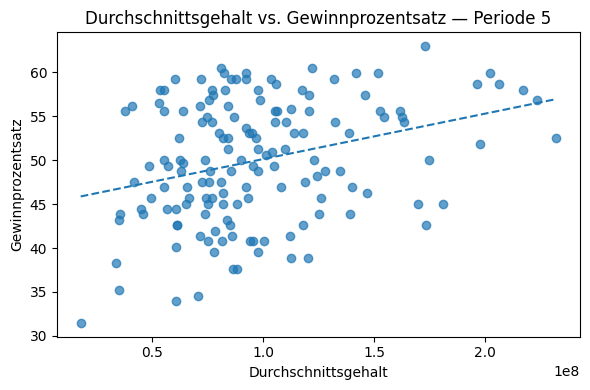

In [13]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Vorhandene View löschen (falls vorhanden) und neu erstellen
conn.execute("DROP VIEW IF EXISTS team_metrics;")
conn.execute("""
             CREATE VIEW team_metrics AS
             SELECT t.yearID,
                    t.teamID,
                    COALESCE(SUM(s.salary), 0) AS total_salary,
                    (t.W * 100.0 / t.G)        AS win_pct
             FROM Teams AS t
                      LEFT JOIN Salaries AS s
                                ON t.yearID = s.yearID
                                    AND t.teamID = s.teamID
             WHERE t.yearID BETWEEN 1871 AND 2022
             GROUP BY t.yearID,
                      t.teamID;
			 """)

# Änderungen speichern und Verbindung schließen
conn.commit()
conn.close()

# 1) Daten laden
conn = sqlite3.connect('lahman_1871-2022.sqlite')
sql = """
      SELECT t.yearID,
             t.teamID,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# 2) Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# 3) In fünf Perioden schneiden
labels = [f'Periode {i}' for i in range(1, 6)]
df['period'] = pd.cut(df['yearID'], bins=5, labels=labels)

# 4) Scatter + (evtl.) Regressionslinie pro Periode
for period in labels:
	sub = df[df['period'] == period]
	x = sub['total_salary']
	y = sub['win_pct']

	plt.figure(figsize=(6, 4))
	plt.scatter(x, y, alpha=0.7)
	plt.title(f'Durchschnittsgehalt vs. Gewinnprozentsatz — {period}')
	plt.xlabel('Durchschnittsgehalt')
	plt.ylabel('Gewinnprozentsatz')

	# nur fitten, wenn mind. 2 Punkte und mehr als 1 unique x-Wert
	if len(sub) >= 2 and x.nunique() > 1:
		try:
			m, b = np.polyfit(x, y, 1)
			xs = np.linspace(x.min(), x.max(), 100)
			plt.plot(xs, m * xs + b, linestyle='--')
		except np.linalg.LinAlgError:
			pass  # ill-conditioned – überspringen

	plt.tight_layout()
	plt.show()



Versuch zwei für Problem 4

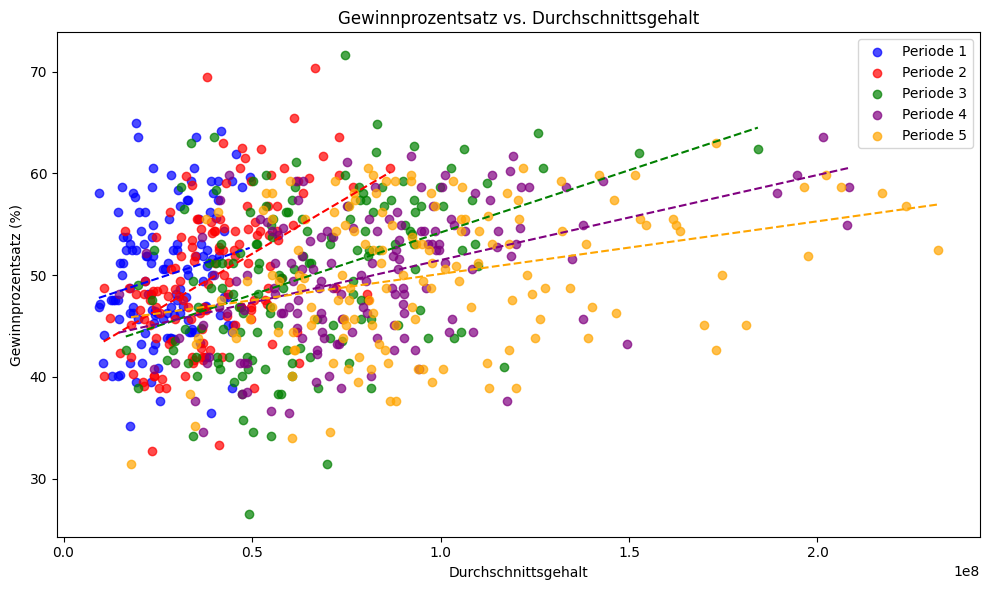

In [14]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Vorhandene View löschen (falls vorhanden) und neu erstellen
conn.execute("DROP VIEW IF EXISTS team_metrics;")
conn.execute("""
             CREATE VIEW team_metrics AS
             SELECT t.yearID,
                    t.teamID,
                    COALESCE(SUM(s.salary), 0) AS total_salary,
                    (t.W * 100.0 / t.G)        AS win_pct
             FROM Teams AS t
                      LEFT JOIN Salaries AS s
                                ON t.yearID = s.yearID
                                    AND t.teamID = s.teamID
             WHERE t.yearID BETWEEN 1871 AND 2022
             GROUP BY t.yearID,
                      t.teamID;
			 """)

# Änderungen speichern und Verbindung schließen
conn.commit()
conn.close()

# 1) Daten laden
conn = sqlite3.connect('lahman_1871-2022.sqlite')
sql = """
      SELECT t.yearID,
             t.teamID,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# 2) Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# 3) In fünf Perioden schneiden
labels = [f'Periode {i}' for i in range(1, 6)]
df['period'] = pd.cut(df['yearID'], bins=5, labels=labels)

# 4) Ein Scatter-Plot mit allen Perioden (statt fünf separaten)
plt.figure(figsize=(10, 6))

# Farben für die verschiedenen Perioden
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Für jede Periode Punkte und Regressionslinie hinzufügen
for i, period in enumerate(labels):
	sub = df[df['period'] == period]
	x = sub['total_salary']
	y = sub['win_pct']

	# Punkte hinzufügen
	plt.scatter(x, y, alpha=0.7, color=colors[i], label=period)

	# Regressionslinie hinzufügen, wenn möglich
	if len(sub) >= 2 and x.nunique() > 1:
		try:
			m, b = np.polyfit(x, y, 1)
			xs = np.linspace(x.min(), x.max(), 100)
			plt.plot(xs, m * xs + b, linestyle='--', color=colors[i])
		except np.linalg.LinAlgError:
			pass  # ill-conditioned – überspringen

plt.title('Gewinnprozentsatz vs. Durchschnittsgehalt')
plt.xlabel('Durchschnittsgehalt')
plt.ylabel('Gewinnprozentsatz (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Beantwortung der Frage 2

Die Analyse der MLB-Daten von 1990-2014 zeigt einen kontinuierlichen Anstieg der Teamgehälter von durchschnittlich 27,55 Millionen auf 97,77 Millionen, wobei der Zusammenhang zwischen Ausgaben und Erfolg über die Zeit stärker wurde. Die Oakland Athletics wechselten ihre Strategie von überdurchschnittlichen zu deutlich unterdurchschnittlichen Ausgaben (-34% bis -36%) und erreichten während der Moneyball-Ära (1997-2006) ihre höchste Effizienz, als sie das zweiteffizienteste Team der Liga wurden. Im Gegensatz zu anderen Low-Budget-Teams wie Pittsburgh oder Miami schafften es die A's, mit bescheidenen Mitteln überdurchschnittliche Ergebnisse zu erzielen, was die Effektivität ihrer datengestützten Spielerverpflichtungsstrategie bestätigt. Auch nach der Kernzeit der Moneyball-Ära blieben die Oakland A's überdurchschnittlich effizient und belegen im Gesamtzeitraum Platz 7 der effizientesten Teams, was die Nachhaltigkeit ihres innovativen Ansatzes unterstreicht.


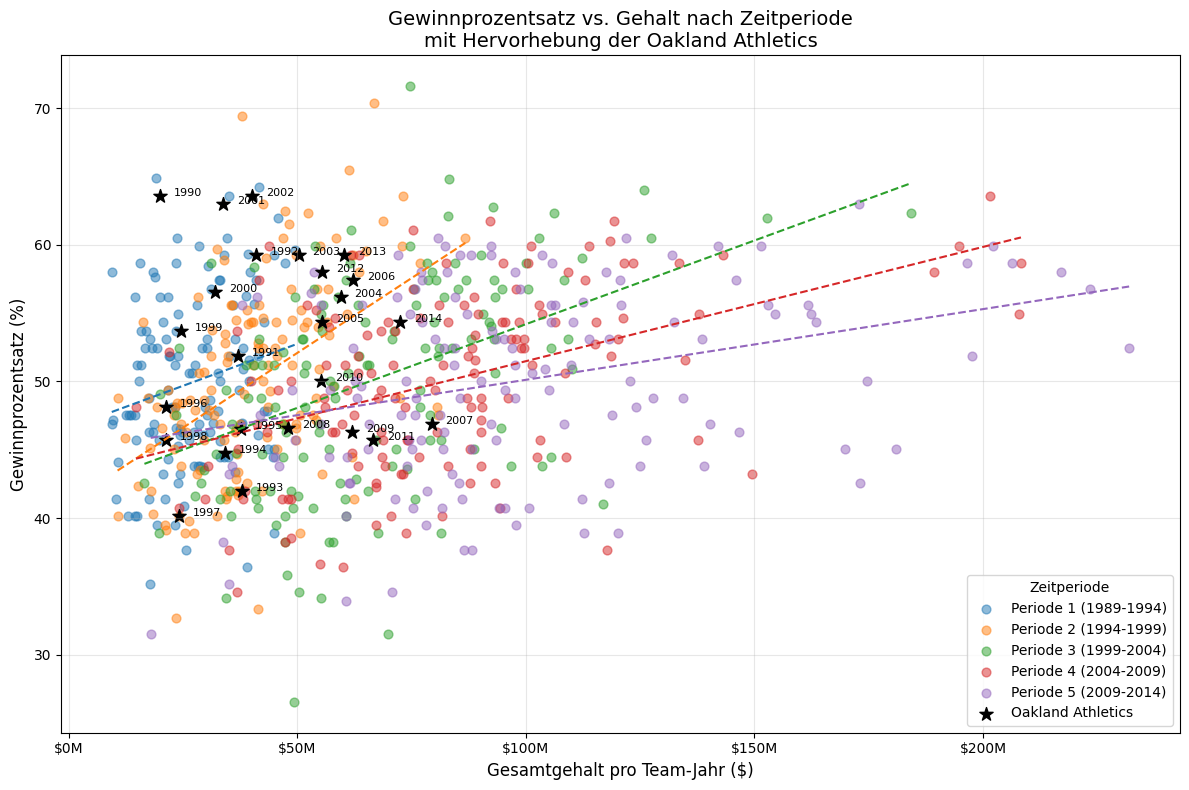

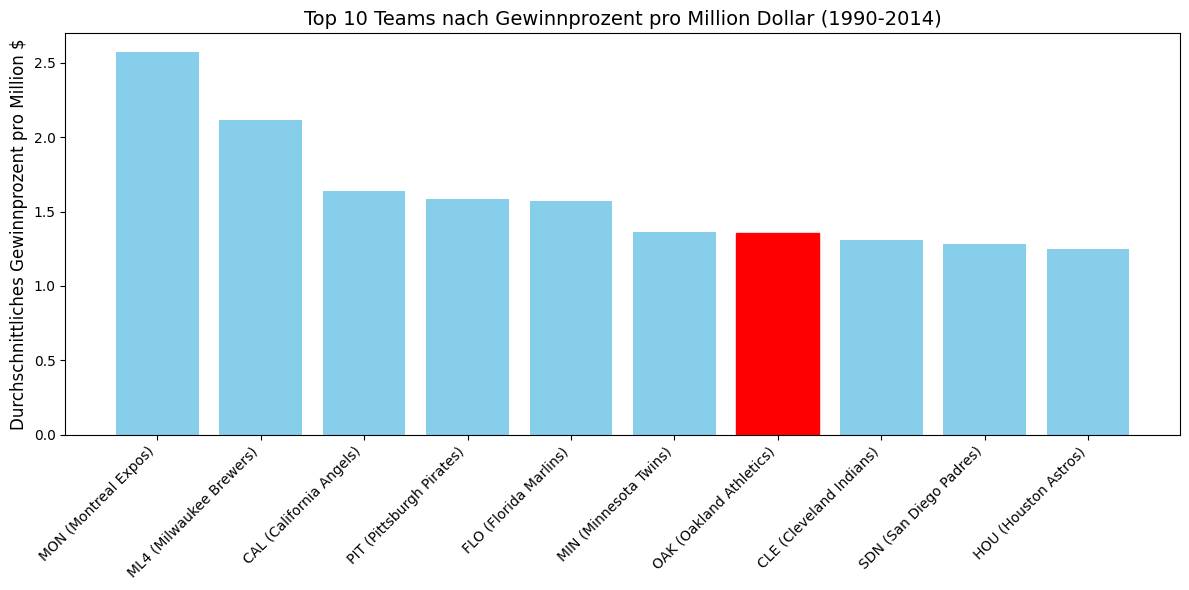

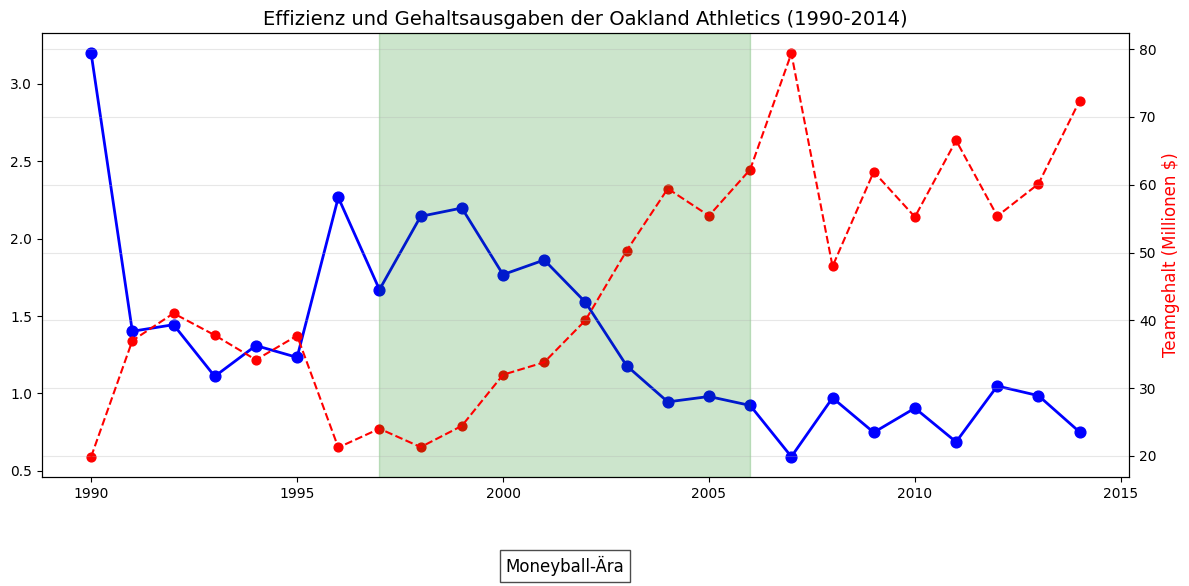

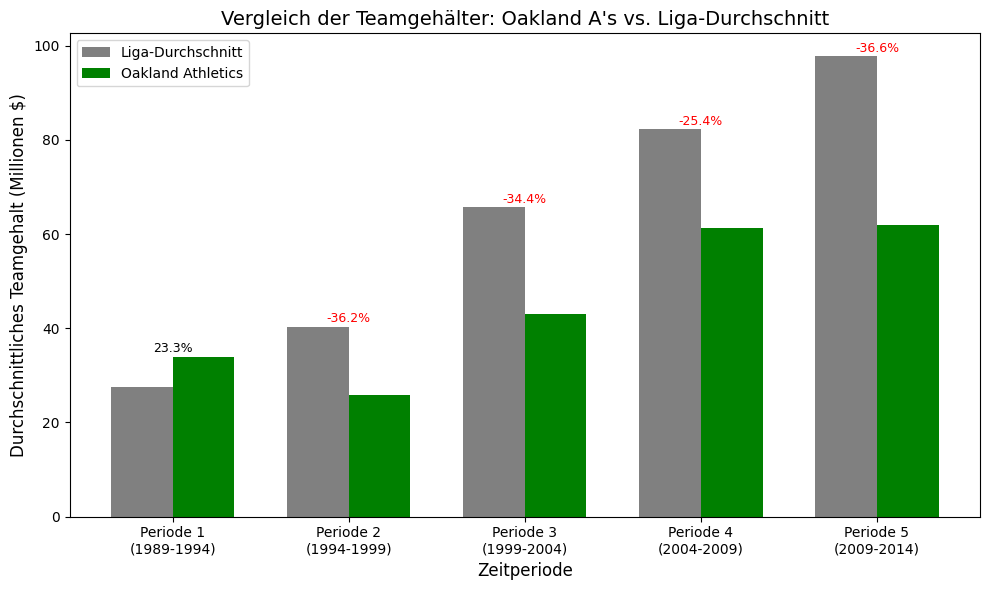


=== ANALYSE DER TEAMGEHÄLTER UND EFFIZIENZ ===

Durchschnittliche Werte pro Periode:

Periode 1 (1989-1994):
  Durchschnittliches Teamgehalt: $27.55 Millionen
  Durchschnittliches Gewinnprozent: 49.99%

Periode 2 (1994-1999):
  Durchschnittliches Teamgehalt: $40.34 Millionen
  Durchschnittliches Gewinnprozent: 49.97%

Periode 3 (1999-2004):
  Durchschnittliches Teamgehalt: $65.67 Millionen
  Durchschnittliches Gewinnprozent: 49.98%

Periode 4 (2004-2009):
  Durchschnittliches Teamgehalt: $82.24 Millionen
  Durchschnittliches Gewinnprozent: 49.99%

Periode 5 (2009-2014):
  Durchschnittliches Teamgehalt: $97.77 Millionen
  Durchschnittliches Gewinnprozent: 50.00%


=== TOP-3 EFFIZIENTESTE TEAMS PRO PERIODE ===

Periode 1 (1989-1994):
  1. MON (Montreal Expos): 3.42 Gewinn% pro Million $
  2. COL (Colorado Rockies): 2.95 Gewinn% pro Million $
  3. CLE (Cleveland Indians): 2.94 Gewinn% pro Million $

Periode 2 (1994-1999):
  1. MON (Montreal Expos): 3.13 Gewinn% pro Million $
  2. PIT (Pi

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Daten laden mit expliziter Einbeziehung des Team-Namens
sql = """
      SELECT t.yearID,
             t.teamID,
             t.name                     AS team_name,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# Effizienz-Kennzahl: Gewinnprozent pro Million Dollar
df['efficiency'] = df['win_pct'] / (df['total_salary'] / 1000000)

# In fünf Perioden schneiden
period_labels = [f'Periode {i}' for i in range(1, 6)]
df['period'] = pd.cut(df['yearID'], bins=5, labels=period_labels)

# Perioden als konkrete Jahreszeitspannen für bessere Interpretation
period_years = pd.cut(df['yearID'], bins=5)
year_ranges = [f"{int(interval.left)}-{int(interval.right)}" for interval in period_years.unique().categories]
period_dict = dict(zip(period_labels, year_ranges))

# Durchschnittliche Werte pro Periode berechnen
# Fix für FutureWarning: observed=False explizit angeben
period_summary = df.groupby('period', observed=False).agg({
	'total_salary': 'mean',
	'win_pct': 'mean',
	'efficiency': 'mean'
}).reset_index()

# ---- TEIL 1: Streudiagramm mit Hervorhebung der Oakland A's ----
plt.figure(figsize=(12, 8))

# Grundlegende Streudiagramm für alle Teams
for i, period in enumerate(period_labels):
	sub = df[df['period'] == period]
	x = sub['total_salary']
	y = sub['win_pct']

	# Punkte hinzufügen (alle Teams außer Oakland)
	mask = (sub['teamID'] != 'OAK')
	plt.scatter(x[mask], y[mask], alpha=0.5, s=40,
				color=f'C{i}', label=f"{period} ({period_dict[period]})")

	# Regressionslinie hinzufügen
	if len(sub) >= 2 and x.nunique() > 1:
		try:
			m, b = np.polyfit(x, y, 1)
			xs = np.linspace(x.min(), x.max(), 100)
			plt.plot(xs, m * xs + b, linestyle='--', color=f'C{i}')
		except np.linalg.LinAlgError:
			pass

# Oakland A's besonders hervorheben
oak_data = df[df['teamID'] == 'OAK']
plt.scatter(oak_data['total_salary'], oak_data['win_pct'],
			color='black', s=100, marker='*', label='Oakland Athletics')

# Beschriftung für Oakland A's Datenpunkte
for idx, row in oak_data.iterrows():
	plt.annotate(str(row['yearID']),
				 xy=(row['total_salary'], row['win_pct']),
				 xytext=(10, 0), textcoords='offset points',
				 fontsize=8)

# Diagramm formatieren
plt.title('Gewinnprozentsatz vs. Durchschnittsgehalt\nmit Hervorhebung der Oakland Athletics', fontsize=14)
plt.xlabel('Gesamtgehalt pro Team-Jahr ($)', fontsize=12)
plt.ylabel('Gewinnprozentsatz (%)', fontsize=12)


# X-Achse in Millionen Dollar formatieren
def millions(x, pos):
	return f'${x / 1000000:.0f}M'


plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))

plt.legend(title='Zeitperiode')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---- TEIL 2: Top 10 Teams nach Effizienz (Gewinnprozent pro Million $) ----
plt.figure(figsize=(12, 6))

# Durchschnittliche Effizienz pro Team über alle Jahre
team_efficiency = df.groupby('teamID', observed=False).agg({
	'efficiency': 'mean',
	'team_name': 'first'  # Um den vollen Teamnamen zu behalten
}).sort_values('efficiency', ascending=False).head(10)

# Balkendiagramm erstellen
bars = plt.bar(range(len(team_efficiency)), team_efficiency['efficiency'], color='skyblue')

# Oakland A's hervorheben, falls in den Top 10
if 'OAK' in team_efficiency.index:
	oak_idx = team_efficiency.index.get_loc('OAK')
	bars[oak_idx].set_color('red')

# X-Achsenbeschriftungen
plt.xticks(range(len(team_efficiency)),
		   [f"{idx} ({name})" for idx, name in zip(team_efficiency.index, team_efficiency['team_name'])],
		   rotation=45, ha='right')

plt.title('Top 10 Teams nach Gewinnprozent pro Million Dollar (1990-2014)', fontsize=14)
plt.ylabel('Durchschnittliches Gewinnprozent pro Million $', fontsize=12)
plt.tight_layout()
plt.show()

# ---- TEIL 3: Entwicklung der Effizienz von Oakland A's im Zeitverlauf ----
plt.figure(figsize=(12, 6))

# Daten für Oakland Athletics
oak_by_year = df[df['teamID'] == 'OAK'].sort_values('yearID')

# Linienverlauf der Effizienz
plt.plot(oak_by_year['yearID'], oak_by_year['efficiency'], 'b-', linewidth=2)
plt.scatter(oak_by_year['yearID'], oak_by_year['efficiency'], color='blue', s=60)

# Linienverlauf des Gehalts (zweite Y-Achse)
ax2 = plt.gca().twinx()
ax2.plot(oak_by_year['yearID'], oak_by_year['total_salary'] / 1000000, 'r--', linewidth=1.5)
ax2.scatter(oak_by_year['yearID'], oak_by_year['total_salary'] / 1000000, color='red', s=40)

# Moneyball-Ära hervorheben (ca. 1997-2006)
plt.axvspan(1997, 2006, alpha=0.2, color='green')
plt.text(2001.5, max(oak_by_year['efficiency']) * 0.9, "Moneyball-Ära",
		 ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Diagramm formatieren
plt.title('Effizienz und Gehaltsausgaben der Oakland Athletics (1990-2014)', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Gewinnprozent pro Million $', color='blue', fontsize=12)
ax2.set_ylabel('Teamgehalt (Millionen $)', color='red', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---- TEIL 4: Ausgabenanalyse nach Perioden ----
# Durchschnittliche Ausgaben pro Periode für alle Teams (mit observed=False)
avg_salary_by_period = df.groupby('period', observed=False)['total_salary'].mean() / 1000000

# Durchschnittliche Ausgaben pro Periode für Oakland A's (mit observed=False)
oak_salary_by_period = oak_data.groupby('period', observed=False)['total_salary'].mean() / 1000000

# Vergleichsdiagramm erstellen
plt.figure(figsize=(10, 6))
bar_width = 0.35
idx = np.arange(len(period_labels))

bars1 = plt.bar(idx - bar_width / 2, avg_salary_by_period, bar_width,
				label='Liga-Durchschnitt', color='gray')
bars2 = plt.bar(idx + bar_width / 2, oak_salary_by_period, bar_width,
				label='Oakland Athletics', color='green')

# Beschriftungen und Formatierung
plt.xlabel('Zeitperiode', fontsize=12)
plt.ylabel('Durchschnittliches Teamgehalt (Millionen $)', fontsize=12)
plt.title('Vergleich der Teamgehälter: Oakland A\'s vs. Liga-Durchschnitt', fontsize=14)
plt.xticks(idx, [f"{p}\n({period_dict[p]})" for p in period_labels])
plt.legend()

# Prozentuale Differenz anzeigen
for i in range(len(period_labels)):
	diff_pct = (oak_salary_by_period.iloc[i] / avg_salary_by_period.iloc[i] - 1) * 100
	plt.text(i, max(oak_salary_by_period.iloc[i], avg_salary_by_period.iloc[i]) + 1,
			 f"{diff_pct:.1f}%", ha='center', fontsize=9,
			 color='red' if diff_pct < 0 else 'black')

plt.tight_layout()
plt.show()

# ---- TEIL 5: Textausgabe: Detaillierte Analyse der Oakland A's ----
# Fix für die Gruppierung und Aggregation
oak_by_period = oak_data.groupby('period', observed=False).agg({
	'efficiency': 'mean',
	'win_pct': 'mean',
	'total_salary': 'mean',
	'yearID': ['min', 'max']
})

# Die Top-3 effizientesten Teams pro Periode
top_teams_by_period = df.groupby(['period', 'teamID'], observed=False).agg({
	'efficiency': 'mean',
	'team_name': 'first'
}).sort_values(['period', 'efficiency'], ascending=[True, False])

# Ergebnisse anzeigen
print("\n=== ANALYSE DER TEAMGEHÄLTER UND EFFIZIENZ ===")
print("\nDurchschnittliche Werte pro Periode:")
for period in period_labels:
	print(f"\n{period} ({period_dict[period]}):")
	print(f"  Durchschnittliches Teamgehalt: ${period_summary[period_summary['period'] == period]['total_salary'].values[0] / 1000000:.2f} Millionen")
	print(f"  Durchschnittliches Gewinnprozent: {period_summary[period_summary['period'] == period]['win_pct'].values[0]:.2f}%")

print("\n\n=== TOP-3 EFFIZIENTESTE TEAMS PRO PERIODE ===")
for period in period_labels:
	print(f"\n{period} ({period_dict[period]}):")
	top3 = top_teams_by_period.loc[period].head(3)
	for i, (idx, row) in enumerate(top3.iterrows(), 1):
		print(f"  {i}. {idx} ({row['team_name']}): {row['efficiency']:.2f} Gewinn% pro Million $")

# Problem 5
Erstelle eine neue Variable in deinem Datensatz, die das Gehalt in Abhängigkeit vom Jahr
standardisiert. Diese Spalte für Team i im Jahr j sollte folgendermaßen gleich sein:
`𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝑖𝑠𝑖𝑒𝑟𝑡𝑒𝑠_𝑔𝑒ℎ𝑎𝑙𝑡_𝑖𝑗 = (𝑔𝑒ℎ𝑎𝑙𝑡_𝑖𝑗 − 𝑑𝑢𝑟𝑐ℎ𝑠𝑐ℎ𝑛𝑖𝑡𝑡𝑙𝑖𝑐ℎ𝑒𝑠_𝑔𝑒ℎ𝑎𝑙𝑡_𝑗) / 𝑠_𝑗`
Wobei:
•standardisiertes_gehalt_ij die standardisierte Gehaltsspalte für Team i im Jahr j ist,
•gehalt_ij das Gehalt für Team i im Jahr j,
•durchschnittliches_gehalt_j das durchschnittliche Gehalt für das Jahr j, und
•s_j die Standardabweichung des Gehalts für das Jahr j ist.

# Problem 6
Wiederhole die gleichen Diagramme wie in Problem 4, verwende aber diese neue
standardisierte Gehaltsvariable.

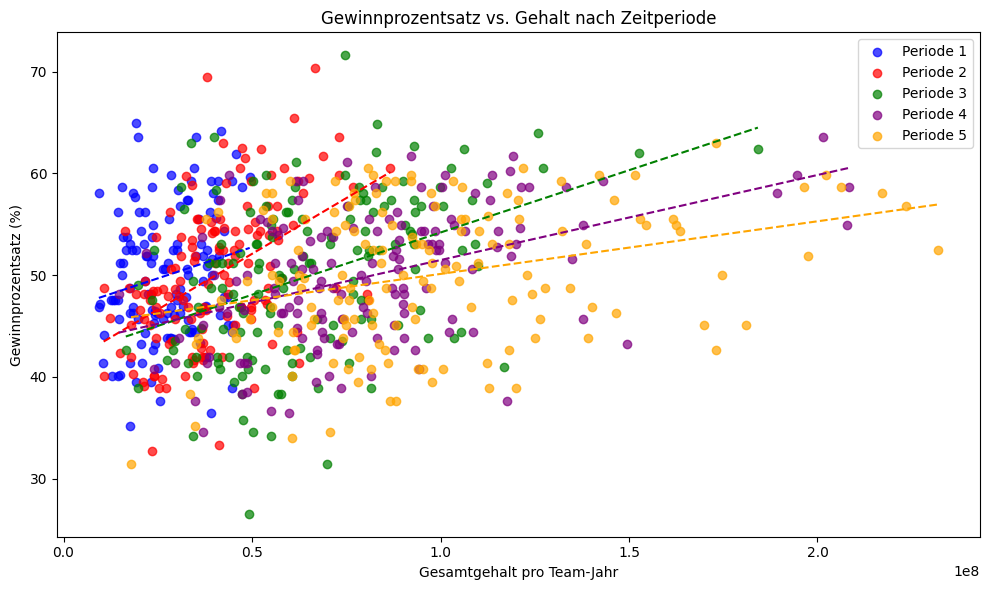

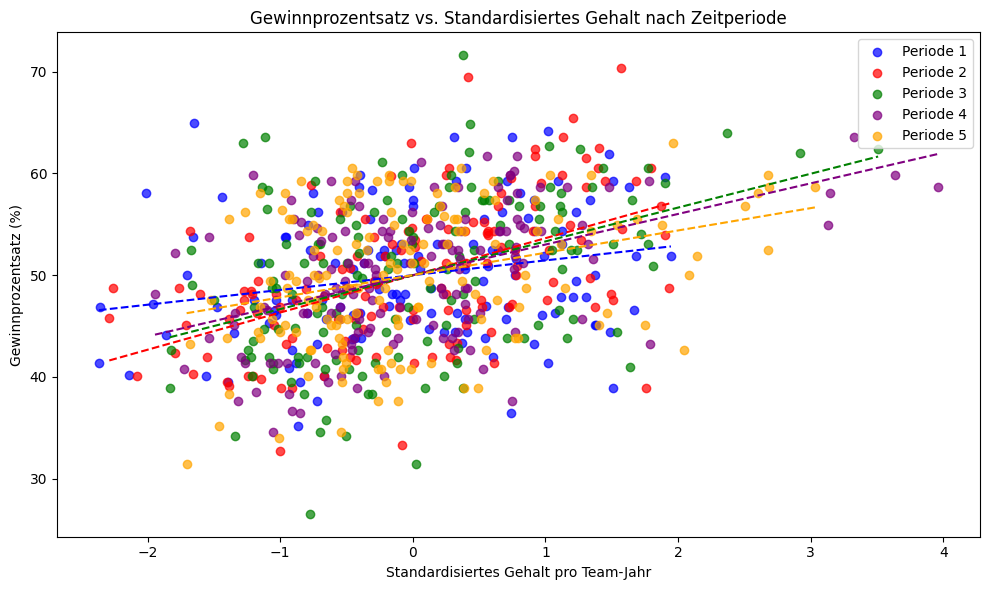

Statistiken zu standardisiertem Gehalt nach Perioden:
           count          mean       std       min       25%       50%  \
period                                                                   
Periode 1  134.0  4.971148e-18  0.984848 -2.366806 -0.719947 -0.010226   
Periode 2  144.0  7.709882e-17  0.985915 -2.288003 -0.675247  0.015577   
Periode 3  150.0  5.921189e-18  0.986486 -1.831791 -0.760010 -0.112520   
Periode 4  150.0  1.480297e-17  0.986486 -1.943624 -0.615444 -0.178872   
Periode 5  150.0 -2.072416e-17  0.986486 -1.705092 -0.678452 -0.183079   

                75%       max  
period                         
Periode 1  0.744950  1.946487  
Periode 2  0.683734  1.933982  
Periode 3  0.626442  3.508754  
Periode 4  0.486648  3.960514  
Periode 5  0.450824  3.033485  


In [16]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Vorhandene View löschen (falls vorhanden) und neu erstellen
conn.execute("DROP VIEW IF EXISTS team_metrics;")
conn.execute("""
             CREATE VIEW team_metrics AS
             SELECT t.yearID,
                    t.teamID,
                    COALESCE(SUM(s.salary), 0) AS total_salary,
                    (t.W * 100.0 / t.G)        AS win_pct
             FROM Teams AS t
                      LEFT JOIN Salaries AS s
                                ON t.yearID = s.yearID
                                    AND t.teamID = s.teamID
             WHERE t.yearID BETWEEN 1871 AND 2022
             GROUP BY t.yearID,
                      t.teamID;
			 """)

# Änderungen speichern und Verbindung schließen
conn.commit()
conn.close()

# 1) Daten laden
conn = sqlite3.connect('lahman_1871-2022.sqlite')
sql = """
      SELECT t.yearID,
             t.teamID,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# 2) Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# Problem 5: Gehalt standardisieren
# Durchschnittliches Gehalt und Standardabweichung pro Jahr berechnen
yearly_stats = df.groupby('yearID')['total_salary'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['yearID', 'mean_salary', 'std_salary']

# Mit dem Hauptdatensatz zusammenführen
df = pd.merge(df, yearly_stats, on='yearID')

# Standardisiertes Gehalt berechnen
df['standardized_salary'] = (df['total_salary'] - df['mean_salary']) / df['std_salary']

# 3) In fünf Perioden schneiden
labels = [f'Periode {i}' for i in range(1, 6)]
df['period'] = pd.cut(df['yearID'], bins=5, labels=labels)

# Problem 6: Gleiche Diagramme wie in Problem 4, aber mit standardisiertem Gehalt
# Diagramm mit ursprünglichem Gehalt (Problem 4)
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Für jede Periode Punkte und Regressionslinie hinzufügen
for i, period in enumerate(labels):
	sub = df[df['period'] == period]
	x = sub['total_salary']
	y = sub['win_pct']

	# Punkte hinzufügen
	plt.scatter(x, y, alpha=0.7, color=colors[i], label=period)

	# Regressionslinie hinzufügen, wenn möglich
	if len(sub) >= 2 and x.nunique() > 1:
		try:
			m, b = np.polyfit(x, y, 1)
			xs = np.linspace(x.min(), x.max(), 100)
			plt.plot(xs, m * xs + b, linestyle='--', color=colors[i])
		except np.linalg.LinAlgError:
			pass  # ill-conditioned – überspringen

plt.title('Gewinnprozentsatz vs. Gehalt nach Zeitperiode')
plt.xlabel('Gesamtgehalt pro Team-Jahr')
plt.ylabel('Gewinnprozentsatz (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Diagramm mit standardisiertem Gehalt (Problem 6)
plt.figure(figsize=(10, 6))

# Für jede Periode Punkte und Regressionslinie hinzufügen
for i, period in enumerate(labels):
	sub = df[df['period'] == period]
	x = sub['standardized_salary']
	y = sub['win_pct']

	# Punkte hinzufügen
	plt.scatter(x, y, alpha=0.7, color=colors[i], label=period)

	# Regressionslinie hinzufügen, wenn möglich
	if len(sub) >= 2 and x.nunique() > 1:
		try:
			m, b = np.polyfit(x, y, 1)
			xs = np.linspace(x.min(), x.max(), 100)
			plt.plot(xs, m * xs + b, linestyle='--', color=colors[i])
		except np.linalg.LinAlgError:
			pass  # ill-conditioned – überspringen

plt.title('Gewinnprozentsatz vs. Standardisiertes Gehalt nach Zeitperiode')
plt.xlabel('Standardisiertes Gehalt pro Team-Jahr')
plt.ylabel('Gewinnprozentsatz (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Zusätzlich: Statistiken ausgeben
print("Statistiken zu standardisiertem Gehalt nach Perioden:")
print(df.groupby('period', observed=False)['standardized_salary'].describe())

# Frage 3

Die beiden Diagramme zeigen die Auswirkungen der Standardisierung des Teamgehalts auf die Analyse:

Oberes Diagramm (Problem 4) zeigt absolute Gehälter, wobei frühere Perioden (blau) links und spätere Perioden (gelb) rechts angeordnet sind, was die Gehaltsinflation über die Zeit widerspiegelt.
Unteres Diagramm (Problem 6) mit standardisierten Gehältern verteilt die Datenpunkte aller Perioden gleichmäßiger, da der Inflationseffekt eliminiert wurde.
Hauptvorteile der Standardisierung:

Bessere Vergleichbarkeit zwischen verschiedenen Zeitperioden
Inflationsbereinigung durch Umwandlung in relative Werte (Standardabweichungen vom Jahresdurchschnitt)
Ähnlichere Steigungen der Regressionslinien über alle Perioden, was einen konstanteren Zusammenhang zwischen relativem Gehalt und Erfolg andeutet

Die Standardisierung ermöglicht eine klarere Analyse des Einflusses von Gehaltsunterschieden auf den Erfolg, unabhängig von der zeitlichen Gehaltsentwicklung.

# Lösung Problem 7

Erstelle ein einzelnes Streudiagramm des Gewinnprozentsatzes (y-Achse) vs. standardisiertes
Gehalt (x-Achse). Füge eine Regressionslinie hinzu, um die Beziehung hervorzuheben.
Die Regressionslinie gibt dir den erwarteten Gewinnprozentsatz als Funktion des
standardisierten Gehalts. Aus der Betrachtung der Regressionslinie scheint es, dass Teams, die
ungefähr das durchschnittliche Gehalt in einem gegebenen Jahr ausgeben, 50% ihrer Spiele
gewinnen werden (d.h. der Gewinnprozentsatz ist 50, wenn das standardisierte Gehalt 0 ist),
und Teams erhöhen 5% Siege für jede 2 Standard-Einheiten des Gehalts (d.h., der
Gewinnprozentsatz ist 55, wenn das standardisierte Gehalt 2 ist). Wir werden sehen, wie dies im
Allgemeinen mit linearer Regression später im Kurs gemacht wird.
Aus diesen Beobachtungen können wir den erwarteten Gewinnprozentsatz für Team i im Jahr j
als
`𝑒𝑟𝑤𝑎𝑟𝑡𝑒𝑡𝑒_𝑠𝑖𝑒𝑔𝑞𝑢𝑜𝑡𝑒_𝑖𝑗 = 50 + 2,5 × 𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝑖𝑠𝑖𝑒𝑟𝑡𝑒𝑠_𝑔𝑒ℎ𝑎𝑙𝑡_𝑖𝑗`

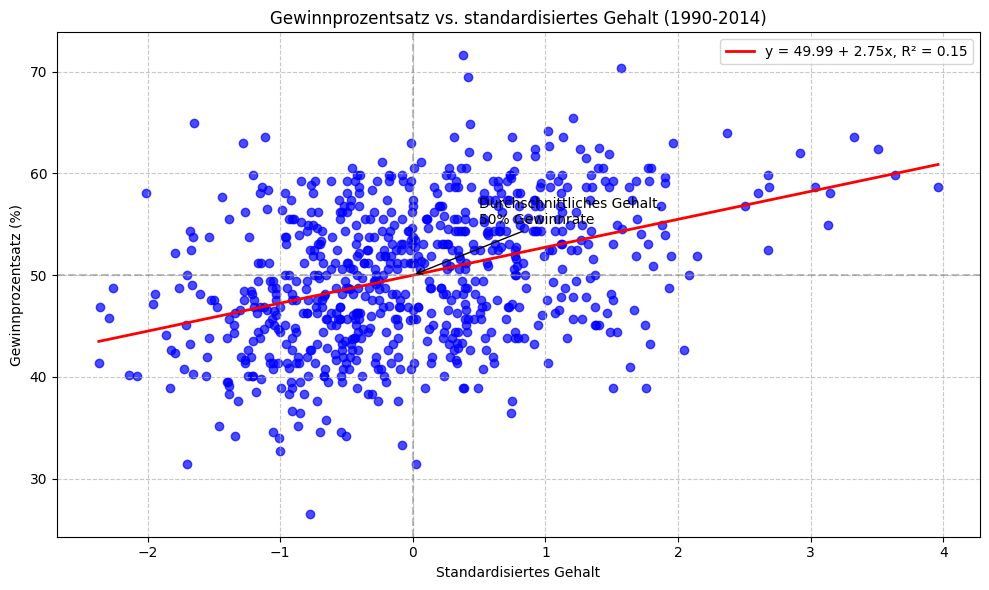

Achsenabschnitt (intercept): 49.99
Steigung (slope): 2.75
Bestimmtheitsmaß (R²): 0.15
p-Wert: 0.0000

Interpretation:
Gewinnprozentsatz = 49.99 + 2.75 * standardisiertes_gehalt
Bei standardisiertem Gehalt = 0 beträgt der erwartete Gewinnprozentsatz 49.99%
Bei standardisiertem Gehalt = 2 beträgt der erwartete Gewinnprozentsatz 55.48%
Bei standardisiertem Gehalt = -2 beträgt der erwartete Gewinnprozentsatz 44.49%


In [15]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Daten laden (1990-2014)
sql = """
      SELECT t.yearID,
             t.teamID,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# Gehälter pro Jahr standardisieren (z-scores)
df['standardized_salary'] = df.groupby('yearID')['total_salary'].transform(
	lambda x: (x - x.mean()) / x.std()
)

# Streudiagramm mit standardisierten Gehältern erstellen
plt.figure(figsize=(10, 6))

# Scatter Plot
plt.scatter(df['standardized_salary'], df['win_pct'], alpha=0.7, color='blue')

# Regressionslinie berechnen und zeichnen
slope, intercept, r_value, p_value, std_err = stats.linregress(
	df['standardized_salary'], df['win_pct']
)

# X-Werte für die Regressionslinie
x_range = np.linspace(df['standardized_salary'].min(), df['standardized_salary'].max(), 100)
# Y-Werte berechnen mit der Regressionsgleichung
y_predicted = intercept + slope * x_range

# Regressionslinie zeichnen
plt.plot(x_range, y_predicted, 'r-', linewidth=2,
		 label=f'y = {intercept:.2f} + {slope:.2f}x, R² = {r_value ** 2:.2f}')

# Beschriftungen und Layout
plt.title('Gewinnprozentsatz vs. standardisiertes Gehalt (1990-2014)')
plt.xlabel('Standardisiertes Gehalt')
plt.ylabel('Gewinnprozentsatz (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)  # Horizontale Linie bei 50%
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)  # Vertikale Linie bei 0

# Beschreibende Annotation hinzufügen
plt.annotate('Durchschnittliches Gehalt,\n50% Gewinnrate', xy=(0, 50), xytext=(0.5, 55),
			 arrowprops=dict(arrowstyle='->'))

plt.legend()
plt.tight_layout()
plt.show()

# Ausgabe der Regressionskoeffizienten
print(f"Achsenabschnitt (intercept): {intercept:.2f}")
print(f"Steigung (slope): {slope:.2f}")
print(f"Bestimmtheitsmaß (R²): {r_value ** 2:.2f}")
print(f"p-Wert: {p_value:.4f}")

# Interpretation der Ergebnisse
print("\nInterpretation:")
print(f"Gewinnprozentsatz = {intercept:.2f} + {slope:.2f} * standardisiertes_gehalt")
print(f"Bei standardisiertem Gehalt = 0 beträgt der erwartete Gewinnprozentsatz {intercept:.2f}%")
print(f"Bei standardisiertem Gehalt = 2 beträgt der erwartete Gewinnprozentsatz {intercept + 2 * slope:.2f}%")
print(f"Bei standardisiertem Gehalt = -2 beträgt der erwartete Gewinnprozentsatz {intercept - 2 * slope:.2f}%")

# Lösung Problem 8

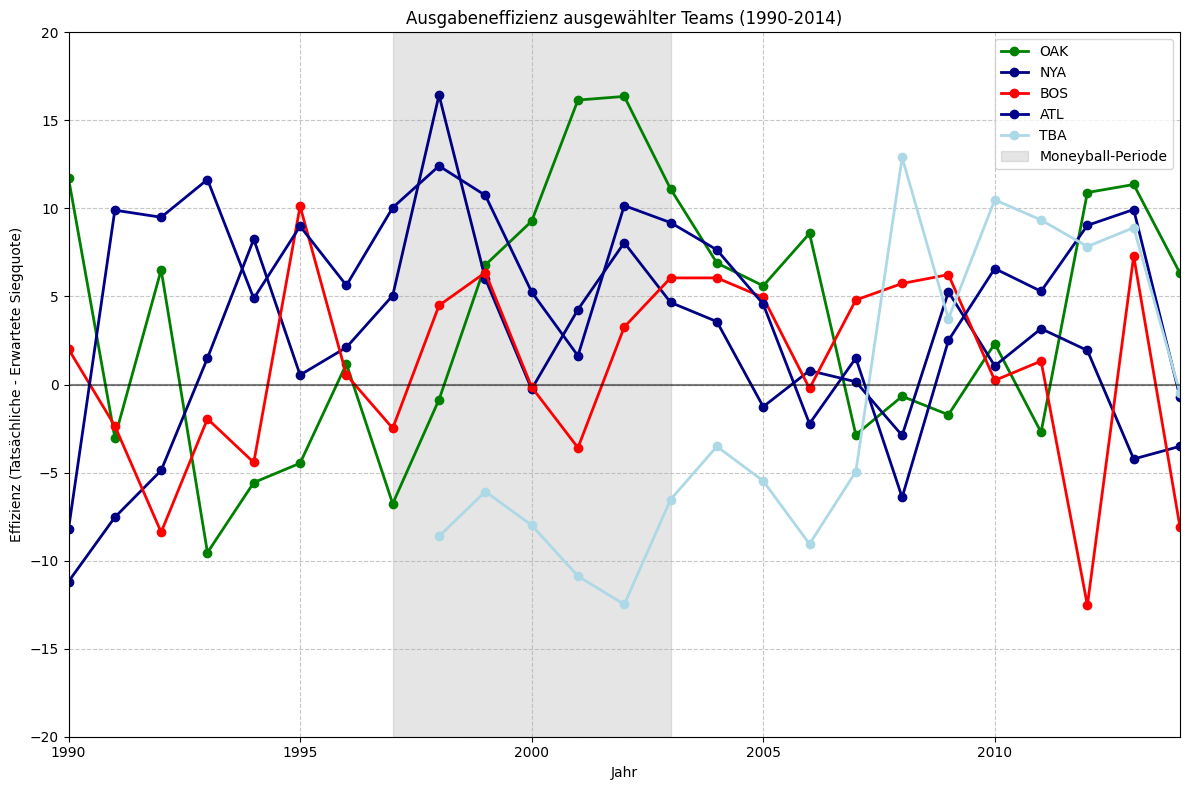

Durchschnittliche Effizienz während der Moneyball-Periode (1997-2003):
OAK: 7.44
NYA: 6.32
BOS: 1.99
ATL: 8.49
TBA: -8.76

Durchschnittliches standardisiertes Gehalt während der Moneyball-Periode:
OAK: -1.16
NYA: 1.99
BOS: 1.05
ATL: 1.14
TBA: -0.78


In [17]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('lahman_1871-2022.sqlite')

# Daten laden (1990-2014)
sql = """
      SELECT t.yearID,
             t.teamID,
             COALESCE(SUM(s.salary), 0) AS total_salary,
             t.W                        AS wins,
             t.G                        AS games
      FROM Teams AS t
               LEFT JOIN Salaries AS s
                         ON t.yearID = s.yearID
                             AND t.teamID = s.teamID
      WHERE t.yearID BETWEEN 1990 AND 2014
      GROUP BY t.yearID, t.teamID \
	  """
df = pd.read_sql_query(sql, conn)
conn.close()

# Gewinnprozentsatz berechnen
df['win_pct'] = df['wins'] * 100.0 / df['games']

# Gehälter pro Jahr standardisieren (z-scores)
df['standardized_salary'] = df.groupby('yearID')['total_salary'].transform(
	lambda x: (x - x.mean()) / x.std()
)

# Erwarteten Gewinnprozentsatz basierend auf der Formel berechnen
df['expected_win_pct'] = 50 + 2.5 * df['standardized_salary']

# Effizienz berechnen
df['efficiency'] = df['win_pct'] - df['expected_win_pct']

# Ausgewählte Teams filtern
selected_teams = ['OAK', 'NYA', 'BOS', 'ATL', 'TBA']
filtered_df = df[df['teamID'].isin(selected_teams)]

# Überprüfen, ob alle Teams im Datensatz vorhanden sind
for team in selected_teams:
	if team not in filtered_df['teamID'].values:
		print(f"Warnung: Team {team} nicht im Datensatz gefunden.")

# Liniendiagramm erstellen
plt.figure(figsize=(12, 8))

# Dictionary für Teamfarben definieren
team_colors = {
	'OAK': 'green',  # Oakland Athletics
	'NYA': 'navy',  # New York Yankees
	'BOS': 'red',  # Boston Red Sox
	'ATL': 'darkblue',  # Atlanta Braves
	'TBA': 'lightblue'  # Tampa Bay Rays
}

# Für jedes Team eine Linie zeichnen
for team in selected_teams:
	team_data = filtered_df[filtered_df['teamID'] == team]
	if not team_data.empty:
		plt.plot(team_data['yearID'], team_data['efficiency'],
				 marker='o', linewidth=2,
				 color=team_colors.get(team),
				 label=team)

# Hervorhebung der Moneyball-Periode (ca. 1997-2003)
plt.axvspan(1997, 2003, alpha=0.2, color='gray', label='Moneyball-Periode')

# Beschriftungen und Layout
plt.title('Ausgabeneffizienz ausgewählter Teams (1990-2014)')
plt.xlabel('Jahr')
plt.ylabel('Effizienz (Tatsächliche - Erwartete Siegquote)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)  # Nulllinie
plt.legend(loc='best')

# Y-Achse für bessere Verständlichkeit
plt.yticks(range(-20, 21, 5))

# Zeitraum auf x-Achse begrenzen
plt.xlim(1990, 2014)

# Analyseinformationen hinzufügen
moneyball_period = (1997, 2003)
oak_moneyball = filtered_df[(filtered_df['teamID'] == 'OAK') &
							(filtered_df['yearID'] >= moneyball_period[0]) &
							(filtered_df['yearID'] <= moneyball_period[1])]

#f not oak_moneyball.empty:
#	avg_efficiency = oak_moneyball['efficiency'].mean()
#	# Annotieren des Oakland-Durchschnittswerts während der Moneyball-Periode
#	plt.annotate(f'Oakland Durchschnitt\nMoneyball: {avg_efficiency:.1f}',
#				 xy=(2000, avg_efficiency), xytext=(2002, avg_efficiency + 8),
#				 arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

# Statistiken für die Analyse ausgeben
print("Durchschnittliche Effizienz während der Moneyball-Periode (1997-2003):")
for team in selected_teams:
	team_moneyball = filtered_df[(filtered_df['teamID'] == team) &
								 (filtered_df['yearID'] >= moneyball_period[0]) &
								 (filtered_df['yearID'] <= moneyball_period[1])]
	if not team_moneyball.empty:
		team_avg = team_moneyball['efficiency'].mean()
		print(f"{team}: {team_avg:.2f}")

# Überprüfen der Gehälter während der Moneyball-Periode
print("\nDurchschnittliches standardisiertes Gehalt während der Moneyball-Periode:")
for team in selected_teams:
	team_moneyball = filtered_df[(filtered_df['teamID'] == team) &
								 (filtered_df['yearID'] >= moneyball_period[0]) &
								 (filtered_df['yearID'] <= moneyball_period[1])]
	if not team_moneyball.empty:
		salary_avg = team_moneyball['standardized_salary'].mean()
		print(f"{team}: {salary_avg:.2f}")